# WeatherPy
----

### Analysis

* The temperature elevates closer to latitude 0 (equator), and decreases further north and south to the latitudes of 90 and -90. The southern hemisphere has higher temperatures than the northern hemisphere.

* The % of humidity, is not distributed in the same way because we see that in most latitudes, there are cities with 100% humidity, 
  this is probably due to the proximity of the city to the coast, and it is not influenced by the latitude. The northern hemisphere seems to be more humid than the south.

* It seems that the cloudiness is not determined by latitude either, since we see that the distribution of data is uniform in all latitudes, concentrating in some of them.

* We only see that the wind speed increases in mid-latitudes, and decreases towards the poles of the planet.
---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)                    #Full range of latitudes
lng_range = (-180, 180)                  #Full range of longuitudes

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#Para pruebas
#lats = np.random.uniform(low=-90.000, high=90.000, size=10)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=10)


lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

contador = 0

# Print the city count to confirm sufficient count
len(cities)


608

In [3]:
#Data for responses
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humid = []
cloud = []
wind_sp = []
country = [] 
date = []
max_temp = []
cities_ok = []

### Perform Open Weather API Calls

In [4]:
#Constructing the url for the api
# EX api.openweathermap.org/data/2.5/weather?q={city name}
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("-----------------------------------------------")

#Calls to Weather API
for cit in cities:
    contador = contador + 1
    url_city = url + "appid=" + api_key + "&units=imperial&q=" + cit
#    print(url_city)

# Get weather data
    weath_response = requests.get(url_city).json()
    
#Handling the exception of city not found
    try:
        weath_response["coord"]
    except KeyError:
        print("City not found. Skipping....")
    else:
    
        print(f"Processing Record {contador} | {cit}")

#Keep the requested data from the JSON received
        cities_ok.append(cit)
        lat.append(weath_response['coord']['lat'])
        lng.append(weath_response['coord']['lon'])
        temp.append(weath_response['main']['temp'])
        humid.append(weath_response['main']['humidity'])
        cloud.append(weath_response['clouds']['all'])
        wind_sp.append(weath_response['wind']['speed'])
        country.append(weath_response['sys']['country'])
        date.append(weath_response['dt'])
        max_temp.append(weath_response['main']['temp_max'])
        
#Printing end of log
print("-----------------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------------")


Beginning Data Retrieval
-----------------------------------------------
Processing Record 1 | butterworth
Processing Record 2 | henties bay
Processing Record 3 | saint-philippe
City not found. Skipping....
Processing Record 5 | lovozero
Processing Record 6 | san bernardo
Processing Record 7 | carnarvon
Processing Record 8 | hasaki
Processing Record 9 | busselton
Processing Record 10 | chowchilla
Processing Record 11 | atuona
Processing Record 12 | margate
Processing Record 13 | cape town
Processing Record 14 | kununurra
City not found. Skipping....
Processing Record 16 | albany
Processing Record 17 | kenai
Processing Record 18 | airai
Processing Record 19 | thompson
Processing Record 20 | ushuaia
Processing Record 21 | taylor
Processing Record 22 | pevek
Processing Record 23 | new norfolk
Processing Record 24 | hilo
Processing Record 25 | tasiilaq
Processing Record 26 | bonfim
Processing Record 27 | hermanus
Processing Record 28 | codrington
City not found. Skipping....
Processing Rec

Processing Record 253 | mazagao
Processing Record 254 | preobrazheniye
Processing Record 255 | general roca
City not found. Skipping....
Processing Record 257 | lata
Processing Record 258 | christchurch
Processing Record 259 | brokopondo
Processing Record 260 | pilar do sul
City not found. Skipping....
Processing Record 262 | tromso
Processing Record 263 | batticaloa
Processing Record 264 | ola
Processing Record 265 | faanui
Processing Record 266 | boende
Processing Record 267 | costinesti
Processing Record 268 | mairi
Processing Record 269 | podgornoye
Processing Record 270 | komsomolskiy
Processing Record 271 | nchelenge
Processing Record 272 | acapulco
Processing Record 273 | panaba
Processing Record 274 | contamana
Processing Record 275 | techiman
Processing Record 276 | muravlenko
Processing Record 277 | crotone
Processing Record 278 | humaita
Processing Record 279 | marsh harbour
Processing Record 280 | yairipok
Processing Record 281 | matara
Processing Record 282 | ambilobe
Proc

Processing Record 500 | arshan
Processing Record 501 | kaka
Processing Record 502 | sorong
Processing Record 503 | jinchang
City not found. Skipping....
Processing Record 505 | belyy yar
Processing Record 506 | tanabe
Processing Record 507 | villarrica
Processing Record 508 | hami
Processing Record 509 | garowe
Processing Record 510 | puerto escondido
Processing Record 511 | petauke
Processing Record 512 | kungurtug
Processing Record 513 | fortuna
Processing Record 514 | dhidhdhoo
Processing Record 515 | vostok
Processing Record 516 | kalianget
Processing Record 517 | torrevieja
Processing Record 518 | musoma
City not found. Skipping....
Processing Record 520 | boyolangu
Processing Record 521 | phan thiet
Processing Record 522 | nantucket
Processing Record 523 | am timan
Processing Record 524 | yumen
Processing Record 525 | yichun
City not found. Skipping....
Processing Record 527 | esmeralda
Processing Record 528 | ambikapur
Processing Record 529 | chulym
Processing Record 530 | makak

In [5]:
print("Total cities processed for weather: " + str(len(cities_ok)))

Total cities processed for weather: 533


### Convert Raw Data to DataFrame

In [6]:
# Place all of the data found into a summary DataFrame
summary_table = pd.DataFrame({"City": cities_ok,                           
                              "Cloudiness": cloud,
                              "Country": country,
                              "Date": date,
                              "Humidity": humid,
                              "Lat": lat,
                              "Lng": lng,
                              "Max Temp": max_temp,
                              "Wind Speed": wind_sp
                             })


# Export data to a CSV file
summary_table.to_csv(output_data_file, index=False, header=True)
summary_table.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butterworth,75,MY,1557851400,79,5.40,100.37,86.00,1.12
1,henties bay,50,NA,1557852713,66,-22.12,14.28,63.69,12.44
2,saint-philippe,90,CA,1557852608,87,45.36,-73.48,48.00,14.99
3,lovozero,100,RU,1557852715,60,68.01,35.02,45.15,1.66
4,san bernardo,0,CL,1557852664,28,-33.59,-70.70,82.99,3.36


### Plotting the Data

#### Latitude vs. Temperature Plot

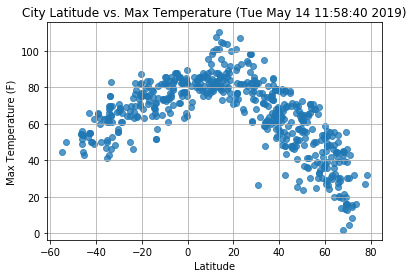

In [7]:
#Plot Latitude vs Temperature
plt.scatter(summary_table["Lat"], summary_table["Max Temp"], alpha=0.75, linewidths=1)
localtime = time.asctime( time.localtime(time.time()) )

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " (" + localtime + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatVsTemp.png")

# Show Figure
plt.show()

#### Latitude vs. Humidity Plot

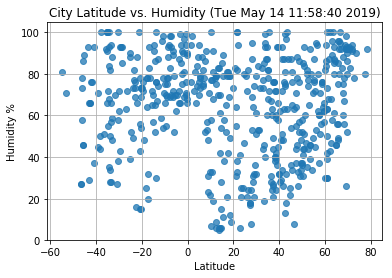

In [8]:
#Plot Latitude vs Humidity
plt.scatter(summary_table["Lat"], summary_table["Humidity"], alpha=0.75, linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity" + " (" + localtime + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatVsHumidity.png")

# Show Figure
plt.show()

#### Latitude vs. Cloudiness Plot

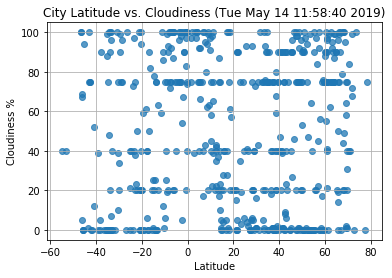

In [9]:
#Plot Latitude vs Cloudiness
plt.scatter(summary_table["Lat"], summary_table["Cloudiness"], alpha=0.75, linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + " (" + localtime + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatVsCloudiness.png")

# Show Figure
plt.show()

#### Latitude vs. Wind Speed Plot

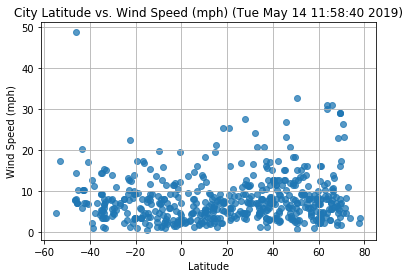

In [10]:
#Plot Latitude vs Cloudiness
plt.scatter(summary_table["Lat"], summary_table["Wind Speed"], alpha=0.75, linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)" + " (" + localtime + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatVsWindSpeed.png")

# Show Figure
plt.show()